In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#MOTIVATION


each tutorial should be sufficiently motivated. If there is not
motivation for the analysis, why would we ‘do data science’ on this topic?

For our final data science project, we will be analyzing different statistics about American colleges, based on the U.S. News Rankings. We hope to predict...

#UNDERSTANDING

the reader of the tutorial should walk away with some new
understanding of the topic at hand. If it’s not possible for a reader to state
‘what they learned’ from reading your tutorial, then why do the analysis?
Resources: tutorials should help the reader learn a skill, but they should
also provide a launching pad for the reader to further develop that skill. The
tutorial should link to additional resources wherever appropriate, so that a
well-motivated reader can read further on techniques that have been used
in the tutorial.

#PROSE

it’s very easy to write the literal English for what the Python code is
doing, but that’s not very useful. The prose should enhance, the tutorial,
adding additional context and insight.


#PIPELINE

Pipeline: all stages of the pipeline should be discussed. We will be looking
for ‘good science’, with discussion of each stage and what it’s
implications/consequences are.

# Communication of Approach

every technical choice has alternatives,
why did you choose the approach taken in the tutorial? A reader should
walk away with some idea of what the trade-offs may be.

# Collecting Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

To filter the data, we decided to sort it by the highest Estimated Gross Incomes, then we took the top 1000 values and resorted it by year in descedning order. Since our motivation is to _____ and the orginal dataset had over 20,000 rows, we felt this was appropirate and would allow data processing to be much quicker.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cmsc320final/Condominium_Comparable_Rental_Income_in_NYC.csv')

df = df.sort_values(by='Estimated Gross Income', ascending=False)
df = df[:1000]
df = df.sort_values(by='Report Year', ascending=True)

df

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year
11,1-00016-7508,200 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,546,1987.0,586224,20136794,5229118.0,14907676,112553026.0,2012
714,1-01049-7501,1 CENTRAL PARK,MIDTOWN WEST,R4-CONDOMINIUM,165,1955.0,377444,15750738,4174531.0,11576207,87401005.0,2012
85,1-00142-7502,200 CHAMBERS STREET,TRIBECA,R4-CONDOMINIUM,311,2005.0,314373,13958161,3964244.0,9993917,75454001.0,2012
673,1-00936-7501,333 EAST 30 STREET,KIPS BAY,R4-CONDOMINIUM,1121,1962.0,1171064,31794388,11359321.0,20435067,154284996.0,2012
27,1-00027-7502,20 EXCHANGE PLACE,FINANCIAL,RR-CONDOMINIUM,350,1929.0,346789,13890120,3648220.0,10241900,80272000.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
19581,1-01331-7502,225 EAST 57 STREET,MIDTOWN EAST,R9 -CONDOPS,260,1964.0,305093,15474317,5879142.0,9595175,77918000.0,2019
19474,1-00890-7501,155 EAST 34 STREET,MURRAY HILL,R4 -ELEVATOR,330,1961.0,270870,12934043,3811141.0,9122902,74091990.0,2019
20214,2-03929-7501,1469 WEST AVENUE,PARKCHESTER,R4 -ELEVATOR,2121,1933.0,1867373,27973248,15797976.0,12175272,86159983.0,2019
20191,1-01307-7502,100 EAST 53 STREET,MIDTOWN CBD,R4 -ELEVATOR,94,2014.0,294885,16575486,5470117.0,11105369,90192005.0,2019


We decided to first analyze the efficency of each rental property. This will tell us the expenses/revenue as a percentage. The percentage indicates how much is spent for every dollar. For example an efficency of .75 indicates that 75 cents in spent for every dollar grossed. Lower efficencies indicate that a property generates a greater return for the owner, which is why we find this indicator important.

Since revenue is already calcutaed as Net Operating Income, we added this column to the dataframe and used it to calculate the efficency. We iterated through the dataset again to divide the Estimated Expense column by our Net Operating Incomecolumn, and then added this new column to the dataset

# Plotting Data

In [ ]:
efficency = []
for i, rows in df.iterrows():
  efficency.append(rows['Estimated Expense'] / rows['Net Operating Income'])

df['Efficency'] = efficency

df

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,Efficency
11,1-00016-7508,200 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,546,1987.0,586224,20136794,5229118.0,14907676,112553026.0,2012,0.350767
714,1-01049-7501,1 CENTRAL PARK,MIDTOWN WEST,R4-CONDOMINIUM,165,1955.0,377444,15750738,4174531.0,11576207,87401005.0,2012,0.360613
85,1-00142-7502,200 CHAMBERS STREET,TRIBECA,R4-CONDOMINIUM,311,2005.0,314373,13958161,3964244.0,9993917,75454001.0,2012,0.396666
673,1-00936-7501,333 EAST 30 STREET,KIPS BAY,R4-CONDOMINIUM,1121,1962.0,1171064,31794388,11359321.0,20435067,154284996.0,2012,0.555874
27,1-00027-7502,20 EXCHANGE PLACE,FINANCIAL,RR-CONDOMINIUM,350,1929.0,346789,13890120,3648220.0,10241900,80272000.0,2012,0.356205
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19581,1-01331-7502,225 EAST 57 STREET,MIDTOWN EAST,R9 -CONDOPS,260,1964.0,305093,15474317,5879142.0,9595175,77918000.0,2019,0.612719
19474,1-00890-7501,155 EAST 34 STREET,MURRAY HILL,R4 -ELEVATOR,330,1961.0,270870,12934043,3811141.0,9122902,74091990.0,2019,0.417755
20214,2-03929-7501,1469 WEST AVENUE,PARKCHESTER,R4 -ELEVATOR,2121,1933.0,1867373,27973248,15797976.0,12175272,86159983.0,2019,1.297546
20191,1-01307-7502,100 EAST 53 STREET,MIDTOWN CBD,R4 -ELEVATOR,94,2014.0,294885,16575486,5470117.0,11105369,90192005.0,2019,0.492565


Next we wanted to look at the best neighborhoods for rental properties over time, based on efficency. We created a scatter plot with a regression line for each neighborhood with over 20 data points. Since the data is already sorted by Net Operating Income, this gave us the top 15 neighborhoods with the highest Net Operating Income.


First, we used a seaborn lmplot to show the efficency of all neighborhoods over time.

Next, we created a new array with neighborhoods with over 15 data points, then used seaborn to plot each graph.

The results of each graph told us that each neighborhood saw an upward trend in efficency, besides Clinton. The Financial District proved to have the highest efficency.

In [ ]:
neighborhood = []
for i in df['Neighborhood'].unique():
  if len(df[df.Neighborhood == i]) > 15:
    neighborhood.append(i)

<function matplotlib.pyplot.show(*args, **kw)>

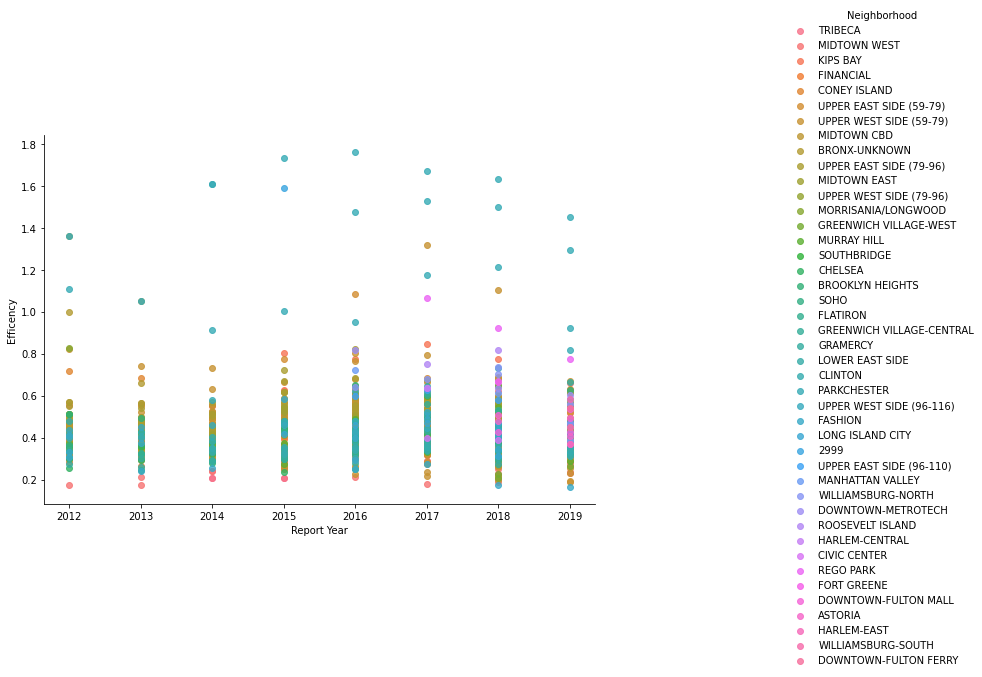

In [ ]:
sns.lmplot(data=df, x = 'Report Year', y = 'Efficency', hue = 'Neighborhood', fit_reg=False) 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 6)
plt.show

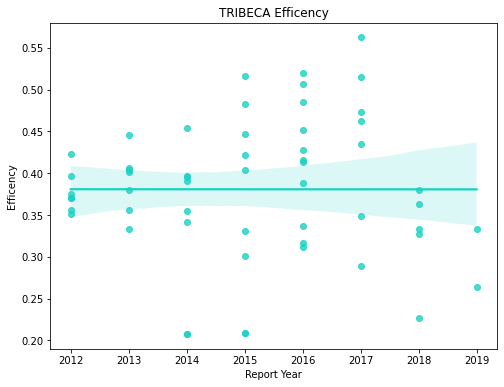

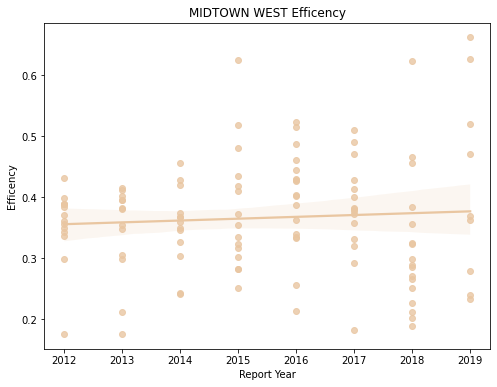

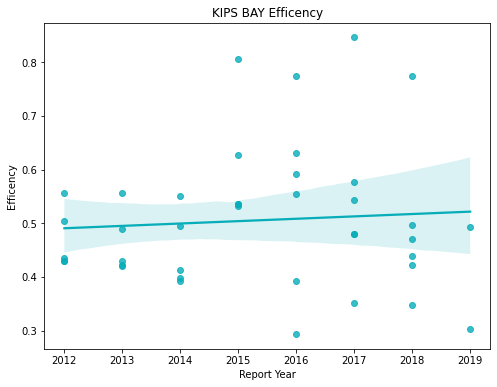

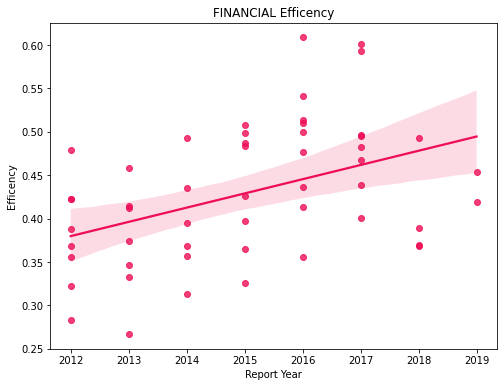

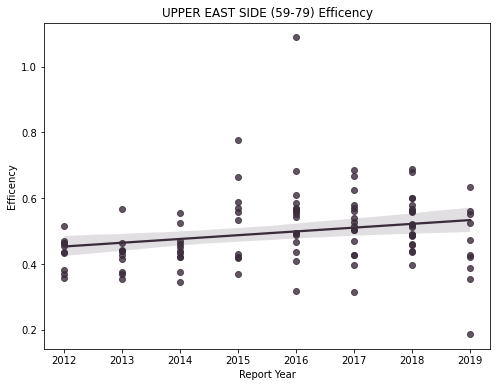

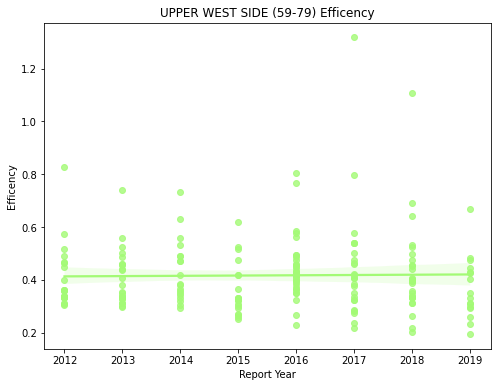

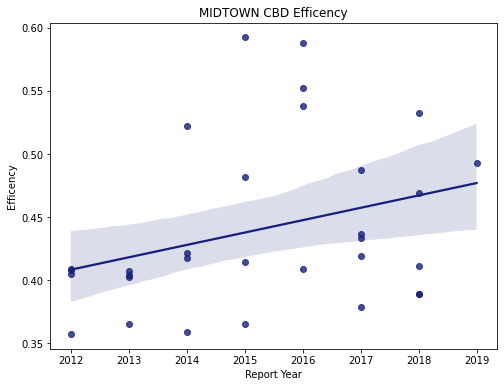

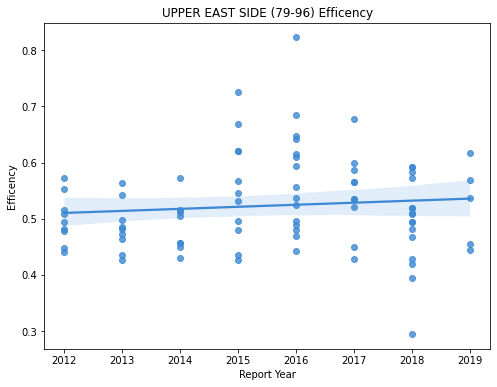

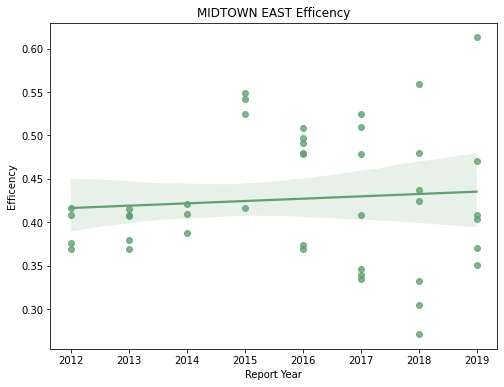

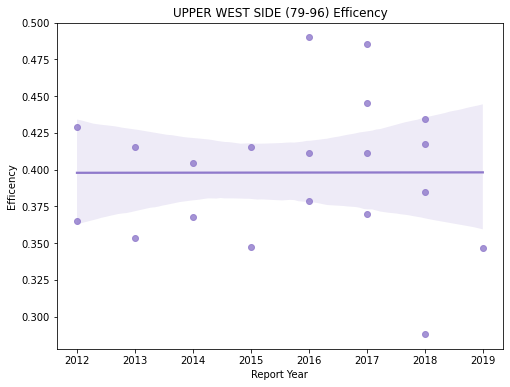

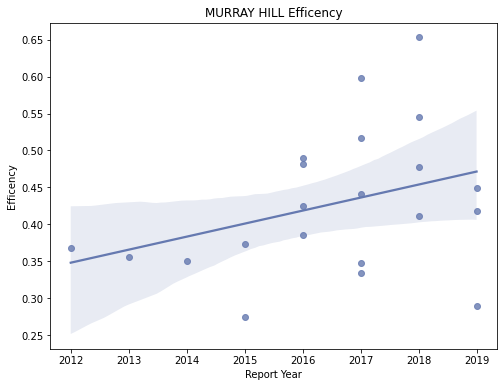

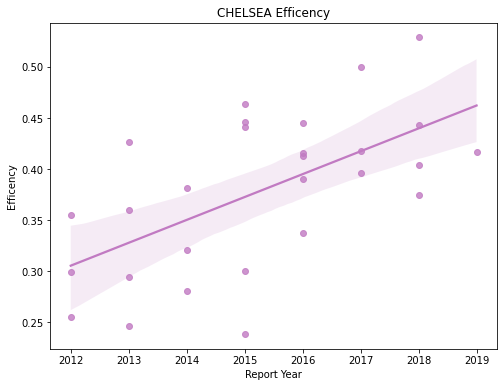

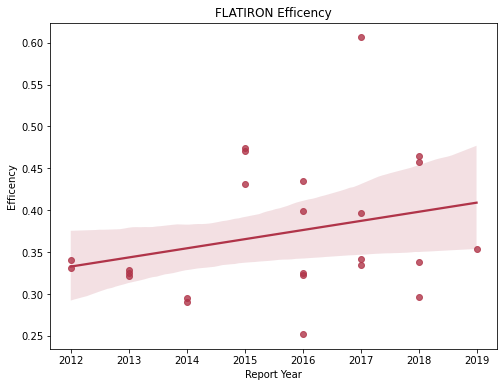

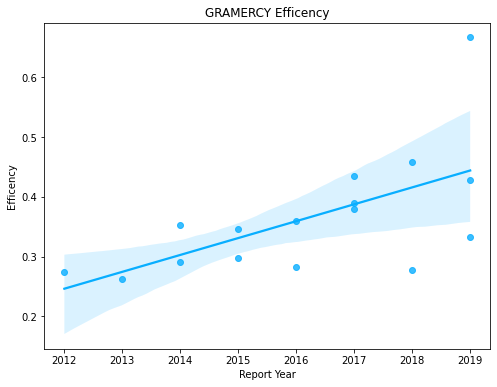

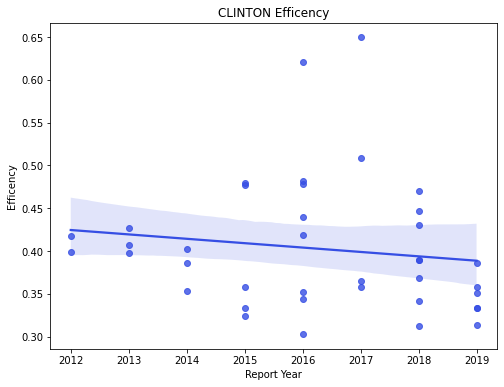

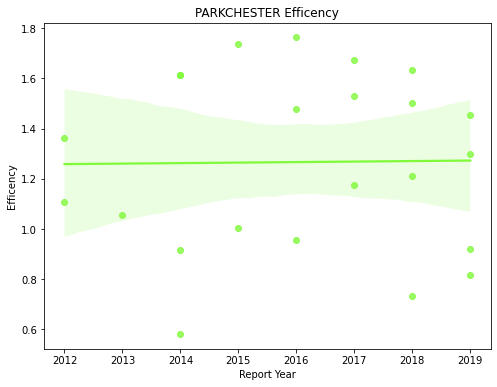

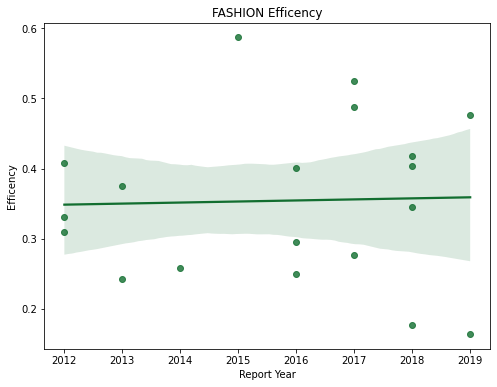

In [ ]:
for i in neighborhood:
  n = df.loc[df['Neighborhood'] == i]
  plt.figure(figsize = (8, 6))
  sns.regplot(data=n, x = 'Report Year', y = 'Efficency', color = np.random.rand(3,)) 
  plt.title(i + " Efficency")

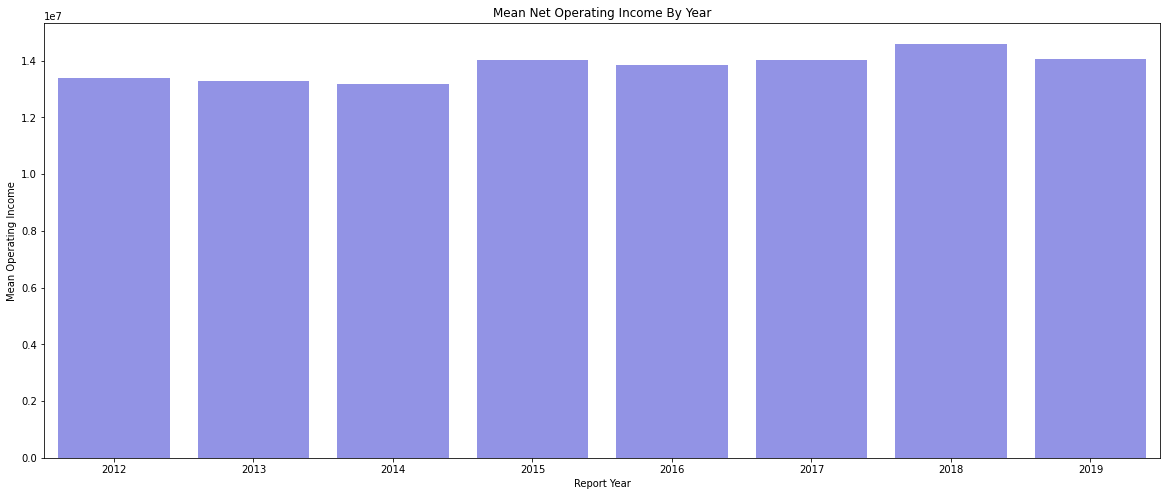

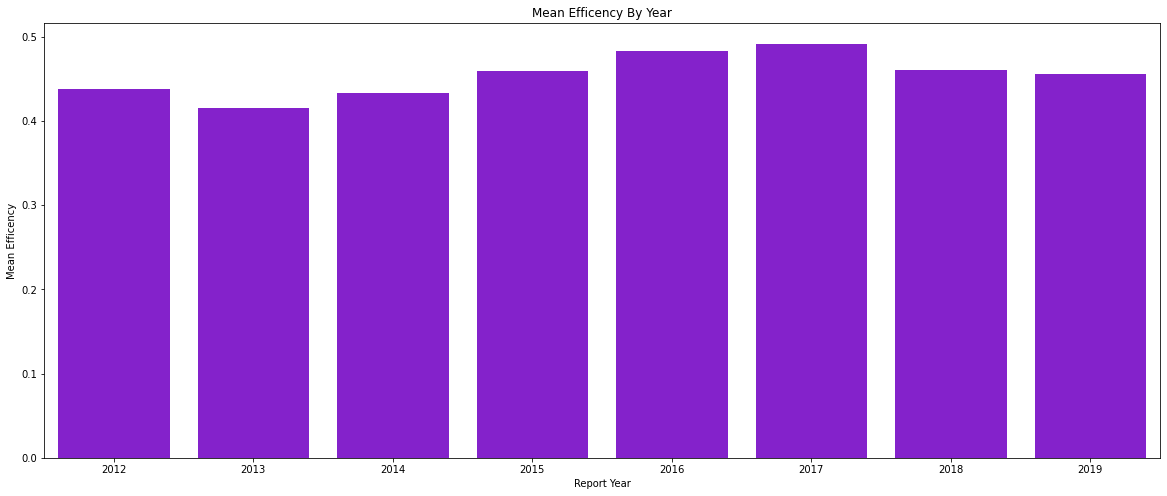

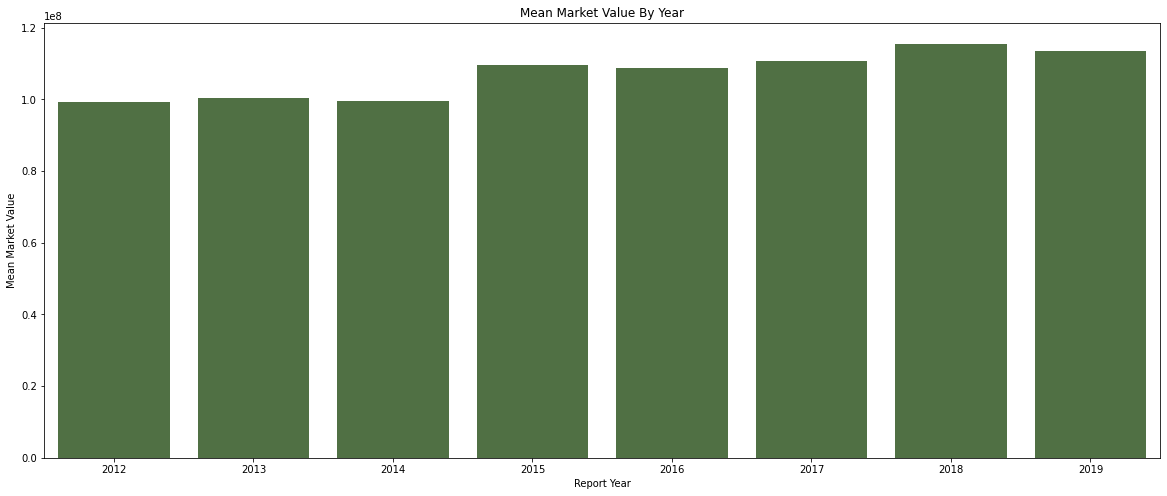

In [ ]:
means = pd.DataFrame()
rep_year = []
avg_net_income = []
avg_efficency = []
avg_market_val = []

for i in range(0,8):
    rep_year.append(i + 2012)
    avg_net_income.append(df.loc[df['Report Year'] == (i + 2012), 'Net Operating Income'].mean())
    avg_efficency.append(df.loc[df['Report Year'] == (i + 2012), 'Efficency'].mean())
    avg_market_val.append(df.loc[df['Report Year'] == (i + 2012), 'Full Market Value'].mean())



means['Report Year'] = rep_year
means['Mean Operating Income'] = avg_net_income
means['Mean Efficency'] = avg_efficency
means['Mean Market Value'] = avg_market_val

sns.barplot(x='Report Year', y='Mean Operating Income', data=means, color = np.random.rand(3,))
plt.title("Mean Net Operating Income By Year")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 8)
plt.show()

plt.title("Mean Efficency By Year")
sns.barplot(x='Report Year', y='Mean Efficency', data=means, color = np.random.rand(3,))
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 8)
plt.show()

sns.barplot(x='Report Year', y='Mean Market Value', data=means, color = np.random.rand(3,))
plt.title("Mean Market Value By Year")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 8)
plt.show()

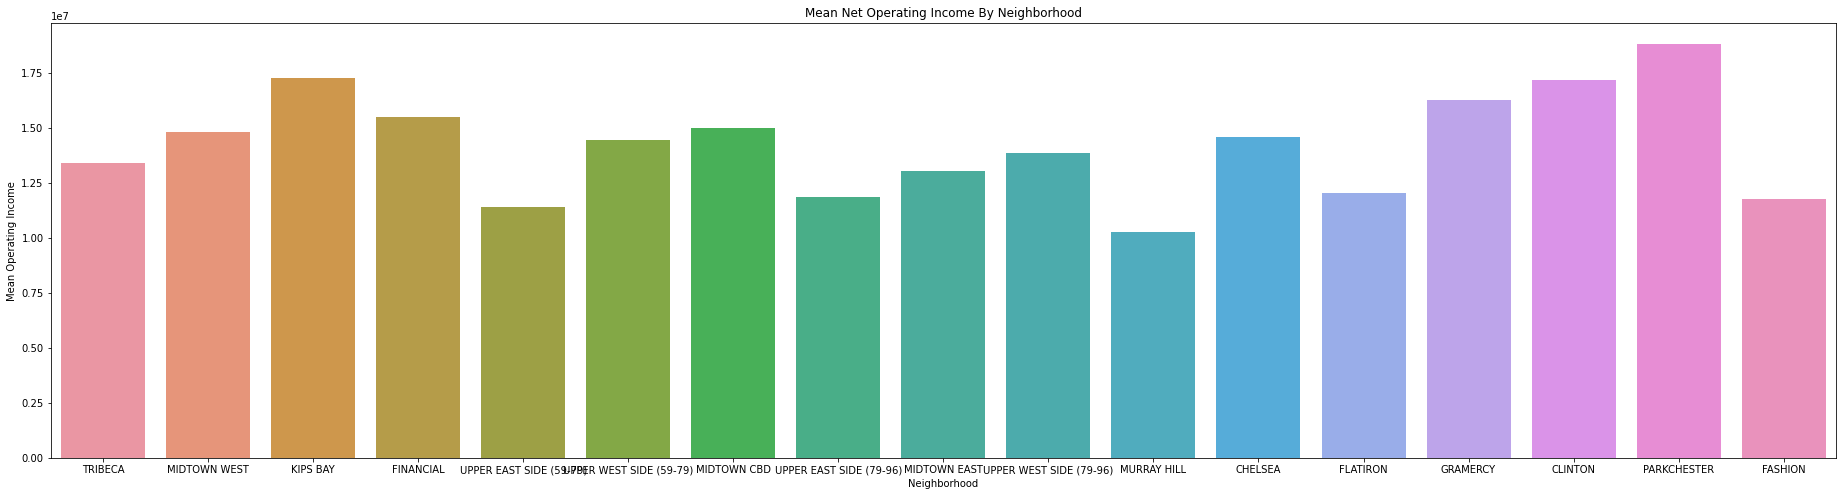

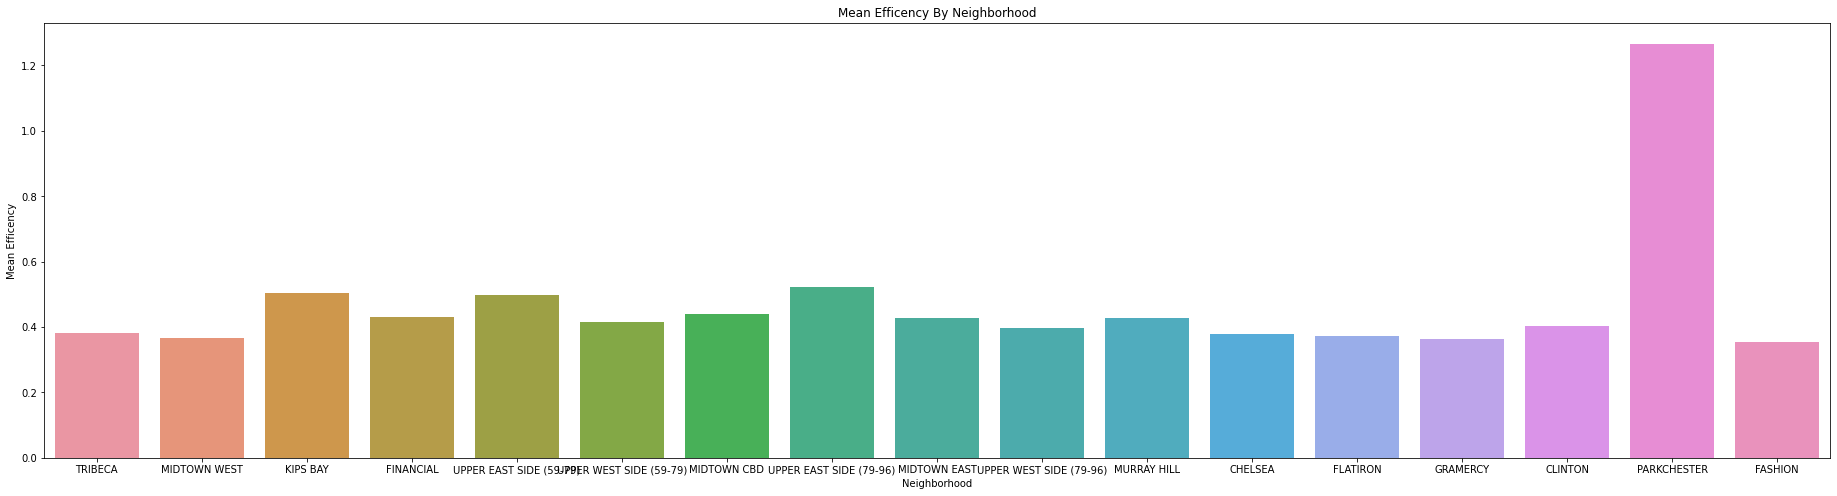

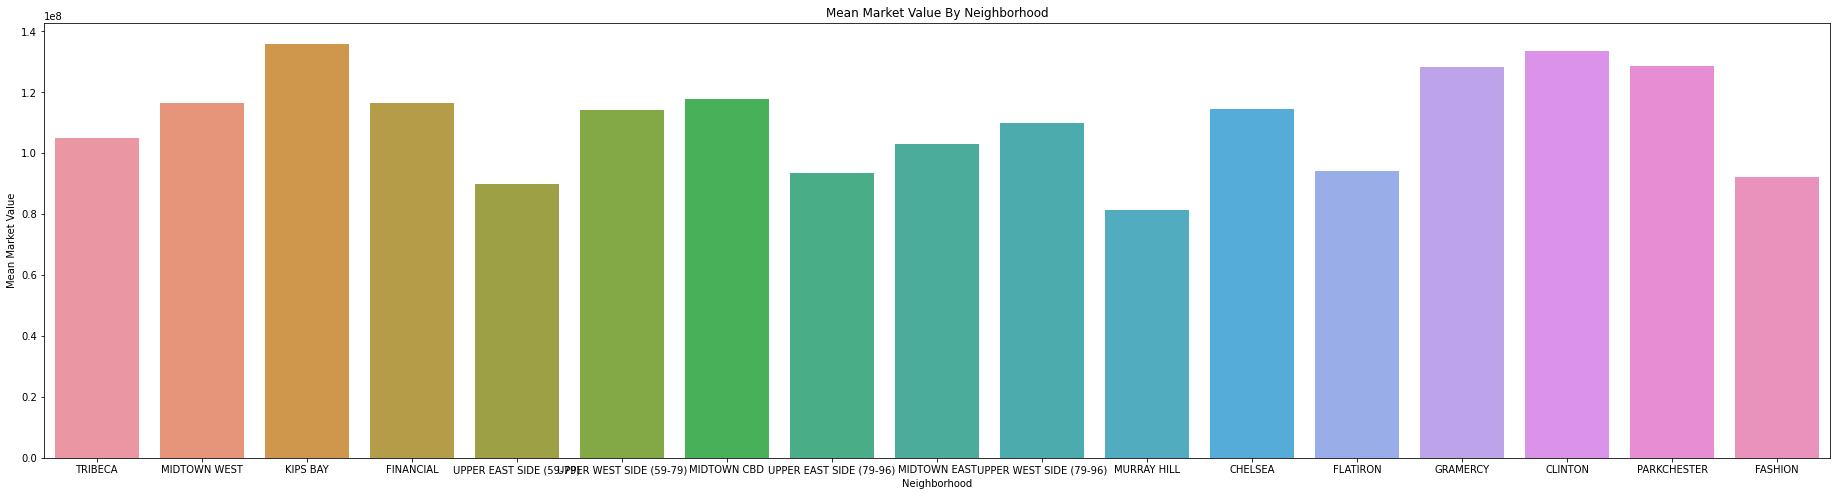

In [ ]:
nmeans = pd.DataFrame()
n = []
avg_net_income = []
avg_efficency = []
avg_market_val = []

for i in neighborhood:
    n.append(i)
    avg_net_income.append(df.loc[df['Neighborhood'] == i, 'Net Operating Income'].mean())
    avg_efficency.append(df.loc[df['Neighborhood'] == i, 'Efficency'].mean())
    avg_market_val.append(df.loc[df['Neighborhood'] == i, 'Full Market Value'].mean())



nmeans['Neighborhood'] = n
nmeans['Mean Operating Income'] = avg_net_income
nmeans['Mean Efficency'] = avg_efficency
nmeans['Mean Market Value'] = avg_market_val

sns.barplot(x='Neighborhood', y='Mean Operating Income', data=nmeans)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(32, 8)
plt.title("Mean Net Operating Income By Neighborhood")
plt.show()

print()

sns.barplot(x='Neighborhood', y='Mean Efficency', data=nmeans)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(32, 8)
plt.title("Mean Efficency By Neighborhood")
plt.show()

print()

sns.barplot(x='Neighborhood', y='Mean Market Value', data=nmeans)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(32, 8)
plt.title("Mean Market Value By Neighborhood")
plt.show()

# Linear Regression

linear regression between year and market value

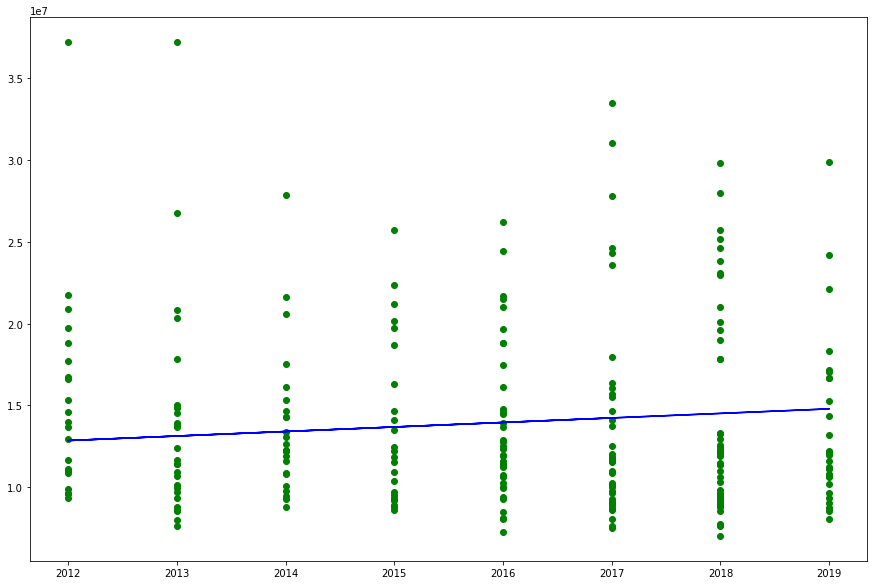

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

X = np.array(df['Report Year']).reshape(-1, 1)
y = np.array(df['Net Operating Income']).reshape(-1, 1)

df.dropna(inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

r = LinearRegression().fit(X_train, y_train)

y_pred = r.predict(X_test)

f, ax = plt.subplots(figsize=(13,10))

plt.scatter(X_test, y_test, color = "green")
plt.plot(X_test, y_pred, color = "blue")


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10)
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


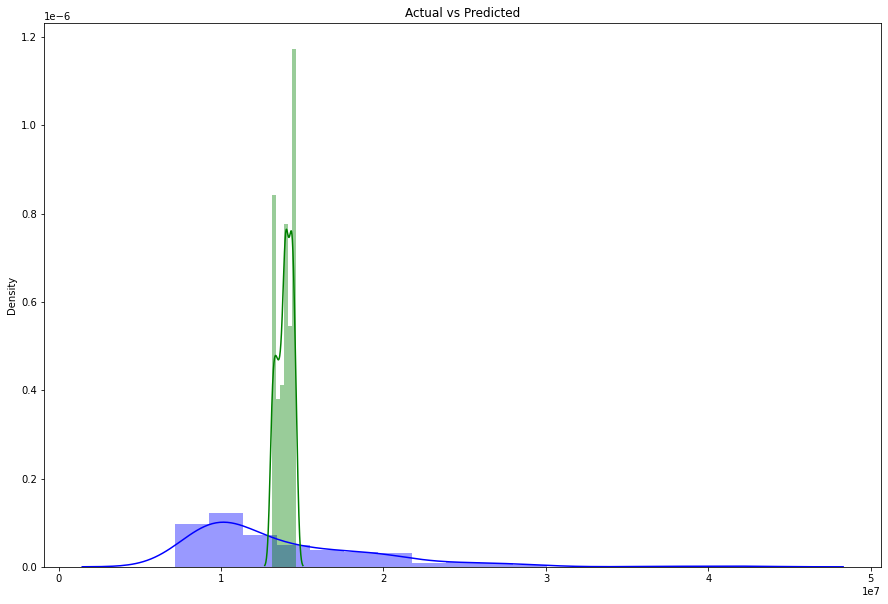

In [ ]:
plt.title("Actual vs Predicted")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10)
sns.distplot(y_test, label = "Actual", color = "blue")
sns.distplot(y_pred, label = "Predicted", color = "green")
plt.show()

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df2 = pd.DataFrame()
df2['year'] = df['Report Year']
df2['income'] = df['Net Operating Income']
df2['area'] = df['Neighborhood']

results = smf.ols(formula='income ~ year * area', data=df2).fit()

results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     2.948
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           1.14e-14
Time:                        01:23:28   Log-Likelihood:                -16840.
No. Observations:                 998   AIC:                         3.384e+04
Df Residuals:                     918   BIC:                         3.423e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                              -9.478e+08   1.07e+09     -0.887      0.375   -3.04e+09    1.15e+09
area[T.ASTORIA]                          8.79e+08    1.5e+10      0.059      0.953   -2.85e+10    3.02e+10
area[T.BRONX-UNKNOWN]                  -4.451e+09   1.06e+10     -0.421      0.674   -2.52e+10    1.63e+10
area[T.BROOKLYN HEIGHTS]               -5.477e+08    2.2e+09     -0.249      0.803   -4.86e+09    3.77e+09
area[T.CHELSEA]                         1.273e+09   1.46e+09      0.874      0.382   -1.59e+09    4.13e+09
area[T.CIVIC CENTER]                   -1.183e+09    1.5e+10     -0.079      0.937   -3.05e+10    2.82e+10
area[T.CLINTON]                        -2.174e+09   1.35e+09     -1.611      0.108   -4.82e+09    4.74e+08
area[T.CONEY ISLAND]                    1.787e+09   1.49e+10      0.120      0.905   -2.75e+10    3.11e+10
area[T.DOWNTOWN-FULTON FERRY]             -0.0898      1.771     -0.051      0.960      -3.565       3.385
area[T.DOWNTOWN-FULTON MALL]            -3.62e+09   1.06e+10     -0.341      0.733   -2.44e+10    1.72e+10
area[T.DOWNTOWN-METROTECH]             -4.422e+08   4.44e+09     -0.100      0.921   -9.15e+09    8.27e+09
area[T.FASHION]                         1.699e+08   1.48e+09      0.115      0.908   -2.73e+09    3.07e+09
area[T.FINANCIAL]                      -1.047e+09    1.3e+09     -0.807      0.420   -3.59e+09     1.5e+09
area[T.FLATIRON]                       -7.413e+07   1.52e+09     -0.049      0.961   -3.05e+09     2.9e+09
area[T.FORT GREENE]                     3.265e+09    1.3e+10      0.252      0.801   -2.22e+10    2.87e+10
area[T.GRAMERCY]                        1.582e+09   1.64e+09      0.968      0.333   -1.63e+09    4.79e+09
area[T.GREENWICH VILLAGE-CENTRAL]       1.373e+09   1.85e+09      0.743      0.457   -2.25e+09       5e+09
area[T.GREENWICH VILLAGE-WEST]         -4.057e+09    1.8e+09     -2.254      0.024   -7.59e+09   -5.24e+08
area[T.HARLEM-CENTRAL]                 -1.925e+08    1.5e+10     -0.013      0.990   -2.95e+10    2.92e+10
area[T.HARLEM-EAST]                       -0.7072      2.003     -0.353      0.724      -4.638       3.223
area[T.KIPS BAY]                        7.893e+08   1.32e+09      0.596      0.551   -1.81e+09    3.39e+09
area[T.LONG ISLAND CITY]                 2.53e+09   2.73e+09      0.926      0.355   -2.83e+09    7.89e+09
area[T.LOWER EAST SIDE]                -6.554e+09   2.43e+09     -2.692      0.007   -1.13e+10   -1.78e+09
area[T.MANHATTAN VALLEY]                 4.98e+08   7.53e+09      0.066      0.947   -1.43e+10    1.53e+10
area[T.MIDTOWN CBD]                    -5.335e+08   1.39e+09     -0.383      0.702   -3.27e+09     2.2e+09
area[T.MIDTOWN EAST]                    1.893e+09   1.29e+09      1.469      0.142   -6